In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("loan.csv")
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Unnamed: 8
0,46109,home,13672,0,10243,4/16/2002,12/20/2003,2.15,NaN
1,46109,credit,9794,0,10984,10/21/2003,7/17/2005,1.25,NaN
2,46109,home,12734,1,10990,2/1/2006,7/5/2007,0.68,NaN
3,46109,cash,12518,1,10596,12/8/2010,5/5/2013,1.24,NaN
4,46109,credit,14049,1,11415,7/7/2010,5/21/2012,3.13,NaN


In [3]:
df.drop(["Unnamed: 8"],axis = 1,inplace = True)
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,4/16/2002,12/20/2003,2.15
1,46109,credit,9794,0,10984,10/21/2003,7/17/2005,1.25
2,46109,home,12734,1,10990,2/1/2006,7/5/2007,0.68
3,46109,cash,12518,1,10596,12/8/2010,5/5/2013,1.24
4,46109,credit,14049,1,11415,7/7/2010,5/21/2012,3.13


In [4]:
df.shape

(443, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   client_id    443 non-null    int64  
 1   loan_type    443 non-null    object 
 2   loan_amount  443 non-null    int64  
 3   repaid       443 non-null    int64  
 4   loan_id      443 non-null    int64  
 5   loan_start   443 non-null    object 
 6   loan_end     443 non-null    object 
 7   rate         443 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 27.8+ KB


In [6]:
df.describe()

,client_id,loan_amount,repaid,loan_id,rate
count,443.000000,443.000000,443.000000,443.000000,443.000000
mean,38911.060948,7982.311512,0.534989,11017.101580,3.217156
std,7768.681063,4172.891992,0.499338,581.826222,2.397168
min,25707.000000,559.000000,0.000000,10009.000000,0.010000
25%,32885.000000,4232.500000,0.000000,10507.500000,1.220000
50%,39505.000000,8320.000000,1.000000,11033.000000,2.780000
75%,46109.000000,11739.000000,1.000000,11526.000000,4.750000
max,49624.000000,14971.000000,1.000000,11991.000000,12.620000


In [7]:
df["loan_start"] = pd.to_datetime(df["loan_start"])
df.dtypes

client_id               int64
loan_type              object
loan_amount             int64
repaid                  int64
loan_id                 int64
loan_start     datetime64[ns]
loan_end               object
rate                  float64
dtype: object

In [8]:
df["loan_end"] = pd.to_datetime(df["loan_end"])
df.dtypes

client_id               int64
loan_type              object
loan_amount             int64
repaid                  int64
loan_id                 int64
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

In [9]:
df.isnull().sum()

client_id      0
loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

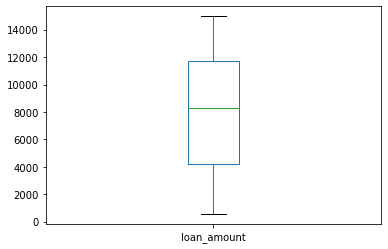

In [10]:
df["loan_amount"].plot(kind="box")
plt.show()

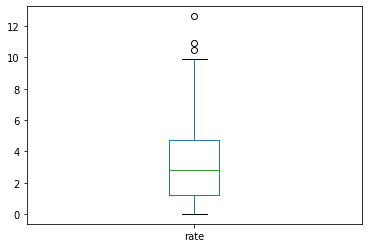

In [11]:
df["rate"].plot(kind="box")
plt.show()

### We can see that there are no outliers in the loan_amount column and some outliers are present in the rate column. 
To treat for outliers can either cap the values or transform the data.
We Shall demonstrate both the approaches here

### sqrt transform

In [12]:
df["sqrt_rate"] = np.sqrt(df["rate"])
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181


In [13]:
print(f"the skewness of original 'rate' is : {df['rate'].skew()}")
print(f"the skewness of new rate 'sqrt_rate' is : {df['sqrt_rate'].skew()}")
print()
print(f"the kurtosis of original 'rate' is : {df['rate'].kurt()}")
print(f"the kurtosis of new rate 'sqrt_rate' is : {df['sqrt_rate'].kurt()}")
print()

the skewness of original 'rate' is : 0.884204614329943
the skewness of new rate 'sqrt_rate' is : 0.04964154055528862

the skewness of original 'rate' is : 0.4243716514373652
the skewness of new rate 'sqrt_rate' is : -0.6318437642052039



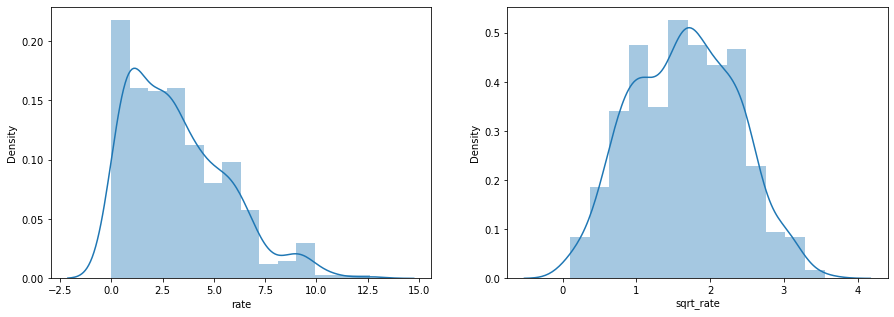

In [14]:
fig, axes = plt.subplots(1,2,figsize = (15,5))
sns.distplot(df["rate"],ax = axes[0])
sns.distplot(df["sqrt_rate"],ax = axes[1])

plt.show()

### Result:
The Rate column was right skewed earlier. The skewness and kurtosis as reduced significantly. 
The transformed SQRT rate, on the right graph resembles normal distribution now.

### log transform

In [15]:
df["log_rate"] = df["rate"].apply(lambda x: np.log(x))
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate,log_rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,0.765468
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,0.223144
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,-0.385662
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,0.215111
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.141033


In [16]:
print(f"the skewness of original 'rate' is : {df['rate'].skew()}")
print(f"the skewness of new rate 'sqrt_rate' is : {df['sqrt_rate'].skew()}")
print(f"the skewness of new rate 'log_rate' is : {df['log_rate'].skew()}")
print()
print(f"the kurtosis of original 'rate' is : {df['rate'].kurt()}")
print(f"the kurtosis of new rate 'sqrt_rate' is : {df['sqrt_rate'].kurt()}")
print(f"the kurtosis of new rate 'log_rate' is : {df['log_rate'].kurt()}")
print()

the skewness of original 'rate' is : 0.884204614329943
the skewness of new rate 'sqrt_rate' is : 0.04964154055528862
the skewness of new rate 'log_rate' is : -1.5943217626331552

the kurtosis of original 'rate' is : 0.4243716514373652
the kurtosis of new rate 'sqrt_rate' is : -0.6318437642052039
the kurtosis of new rate 'log_rate' is : 4.157026150198228



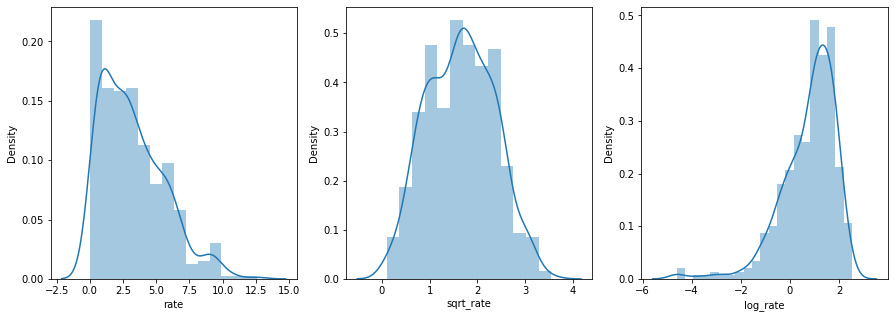

In [17]:
fig, axes = plt.subplots(1,3,figsize = (15,5))
sns.distplot(df["rate"],ax = axes[0])
sns.distplot(df["sqrt_rate"],ax = axes[1])
sns.distplot(df["log_rate"],ax = axes[2])

plt.show()

### Log Transformation made the rate left skewed and more peaked.

However, Log transformation is more closer to 0 and hence is more normal. Though it heavily maniupulates the data.

In our case, square root transformation is more suitable.

### Using SciPy Library to calculate the Z-Score:

In [18]:
from scipy.stats import stats

In [19]:
df["z_score"] = stats.zscore(df["rate"])
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate,log_rate,z_score
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,0.765468,-0.445677
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,0.223144,-0.821544
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,-0.385662,-1.059594
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,0.215111,-0.825721
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.141033,-0.036399


In [20]:
df[(df["z_score"]>3) | (df["z_score"]<-3)]

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate,log_rate,z_score
41,41480,credit,2947,1,10302,2005-11-10,2008-03-16,10.49,3.238827,2.350422,3.037362
195,48177,other,6318,0,10224,2003-02-02,2005-05-08,10.89,3.300000,2.387845,3.204415
421,49624,home,8133,1,10312,2009-03-14,2011-03-21,12.62,3.552464,2.535283,3.926916


In [21]:
len(df[(df["z_score"]>3) | (df["z_score"]<-3)])

3

In [22]:
df[~(df["z_score"]>3) | (df["z_score"]<-3)].head(45)

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate,log_rate,z_score
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,0.765468,-0.445677
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,0.223144,-0.821544
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,-0.385662,-1.059594
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,0.215111,-0.825721
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.141033,-0.036399
5,46109,home,6935,0,11501,2006-09-17,2008-11-26,1.94,1.392839,0.662688,-0.533379
6,46109,cash,6177,1,11141,2007-03-12,2009-04-26,9.48,3.078961,2.249184,2.615555
7,46109,home,12656,0,11658,2006-05-26,2007-10-15,4.14,2.034699,1.420696,0.385408
8,46109,home,11062,1,11611,2012-09-12,2014-03-14,5.48,2.340940,1.701105,0.945033
9,46109,other,4050,1,10828,2003-12-06,2005-08-19,4.26,2.063977,1.449269,0.435524


In [23]:
df2 = df[~(df["z_score"]>3) | (df["z_score"]<-3)].reset_index()
df2.head()

,index,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate,log_rate,z_score
0,0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,0.765468,-0.445677
1,1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,0.223144,-0.821544
2,2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,-0.385662,-1.059594
3,3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,0.215111,-0.825721
4,4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.141033,-0.036399


In [24]:
df2.shape

(440, 12)

### so, we have removed all three outliers by using z-score value

### IQR Method to treat Outliers:

In [25]:
q1 = np.quantile(df2["rate"],0.25)
q2 = np.quantile(df2["rate"],0.50)
q3 = np.quantile(df2["rate"],0.75)

iqr = q3 - q1
ub = q3 + (1.5*iqr)
lb = q1 - (1.5*iqr)

print(ub)
print(lb)

9.87375
-3.9762499999999994


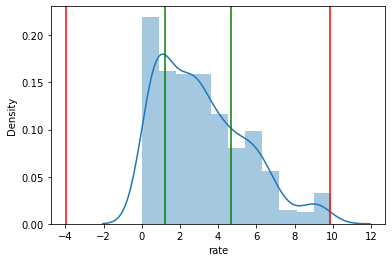

In [26]:
sns.distplot(df2["rate"])
plt.axvline(ub,color = "r")
plt.axvline(lb,color = "r")
plt.axvline(q1,color = "g")
plt.axvline(q3,color = "g")
plt.show()

In [27]:
df2[(df2["rate"]>ub) | (df2["rate"]<lb)]

,index,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate,log_rate,z_score
102,103,39505,cash,11647,1,11928,2003-07-28,2005-12-24,9.91,3.148015,2.293544,2.795137


In [28]:
df3 = df2[~(df2["rate"]>ub) | (df2["rate"]<lb)].reset_index()
df3

,level_0,index,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate,log_rate,z_score
0,0,0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,0.765468,-0.445677
1,1,1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,0.223144,-0.821544
2,2,2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,-0.385662,-1.059594
3,3,3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,0.215111,-0.825721
4,4,4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.141033,-0.036399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,435,438,26945,other,12963,0,10330,2001-11-26,2004-06-11,2.46,1.568439,0.900161,-0.316211
435,436,439,26945,credit,1728,1,10248,2004-01-27,2005-06-21,5.27,2.295648,1.662030,0.857331
436,437,440,26945,other,9329,0,10154,2001-12-17,2004-07-22,5.65,2.376973,1.731656,1.016030
437,438,441,26945,home,4197,0,10333,2003-10-16,2005-07-10,4.50,2.121320,1.504077,0.535755


In [29]:
df3["rate"].max()

9.82

In [30]:
df3.shape

(439, 13)

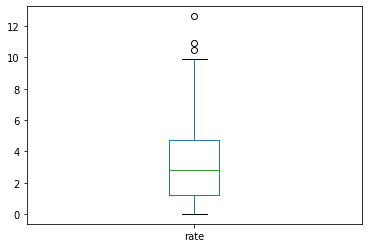

In [31]:
df["rate"].plot(kind = "box")
plt.show()

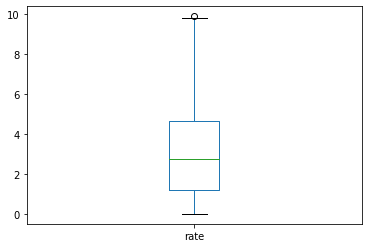

In [32]:
df2["rate"].plot(kind = "box")
plt.show()

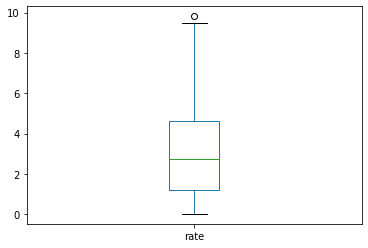

In [33]:
df3["rate"].plot(kind = "box")
plt.show()

### Interpretation:
A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. 
From the above output, we can see that the dimensions are reduced that implies outliers are removed.

###  Standardization (Z-Score)

In [34]:
avg_rate = df3["rate"].mean()
avg_rate

3.1464464692482927

In [35]:
sd_rate = df3["rate"].std()
sd_rate

2.2879199624436177

In [36]:
df3["z_score_rate"] = (df3["rate"] -avg_rate)/sd_rate
df3.head()

,level_0,index,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate,log_rate,z_score,z_score_rate
0,0,0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,0.765468,-0.445677,-0.435525
1,1,1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,0.223144,-0.821544,-0.828895
2,2,2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,-0.385662,-1.059594,-1.078030
3,3,3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,0.215111,-0.825721,-0.833266
4,4,4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.141033,-0.036399,-0.007188


In [37]:
df3.drop(["z_score"],axis=1,inplace = True)
df3.head()

,level_0,index,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate,log_rate,z_score_rate
0,0,0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,0.765468,-0.435525
1,1,1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,0.223144,-0.828895
2,2,2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,-0.385662,-1.078030
3,3,3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,0.215111,-0.833266
4,4,4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.141033,-0.007188


In [38]:
avg_loan_amount = df3["loan_amount"].mean()
avg_loan_amount

7988.881548974943

In [39]:
sd_loan_amount = df3["loan_amount"].std()
sd_loan_amount

4180.560114053602

In [40]:
df3["z_score_loan_amount"] = (df3["loan_amount"] -avg_loan_amount)/sd_loan_amount
df3.head()

,level_0,index,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate,log_rate,z_score_rate,z_score_loan_amount
0,0,0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,0.765468,-0.435525,1.359416
1,1,1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,0.223144,-0.828895,0.431789
2,2,2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,-0.385662,-1.078030,1.135044
3,3,3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,0.215111,-0.833266,1.083376
4,4,4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.141033,-0.007188,1.449595


In [43]:
print(f"the skewness of original 'loan_amount' is : {df3['loan_amount'].skew()}")
print(f"the skewness of new  'z_score_loan_amount' is : {df3['z_score_loan_amount'].skew()}")
print()
print(f"the kurtosis of original 'loan_amount' is : {df3['loan_amount'].kurt()}")
print(f"the kurtosis of new  'z_score_loan_amount' is : {df3['z_score_loan_amount'].kurt()}")
print()

the skewness of original 'loan_amount' is : -0.04238992284864244
the skewness of new  'z_score_loan_amount' is : -0.04238992284864247

the kurtosis of original 'loan_amount' is : -1.2349794881482345
the kurtosis of new  'z_score_loan_amount' is : -1.234979488148235



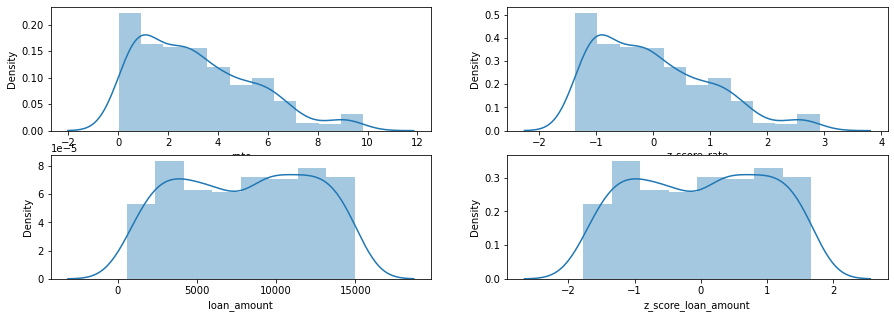

In [47]:
fig, axes = plt.subplots(2,2,figsize =(15,5))
sns.distplot(df3["rate"],ax=axes[0,0])
sns.distplot(df3["z_score_rate"],ax=axes[0,1])
sns.distplot(df3["loan_amount"],ax=axes[1,0])
sns.distplot(df3["z_score_loan_amount"],ax=axes[1,1])
plt.show()

### The only difference between the two curves is of the Range on the x-axis. The impact of scaling on data is: Skewness, Kurtosis and Distribution all remain same.

The need for Scaling is :

1) Comparison between variables is easier 2) Computation power is more efficient and less time consuming.